In [1]:
import gensim
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import string
import scipy
import re

from gensim import corpora, models, similarities

from lightfm import LightFM

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
my_stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')

from scipy.spatial.distance import cdist
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from scipy.linalg import svd

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.model_selection import train_test_split

D:\Anaconda\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


# Reading data sets

1. news_articles
2. User_interest

## news_articles

In [2]:
data = pd.read_csv(r'E:\Jupyterfiles\ML_practice\news_articles.csv')
data.head()

,Article_Id,Title,Author,Date,Content,URL
0,0,14 dead after bus falls into canal in Telangan...,Devyani Sultania,"August 22, 2016 12:34 IST",At least 14 people died and 17 others were inj...,http://www.ibtimes.co.in/14-dead-after-bus-fal...
1,1,Pratibha Tiwari molested on busy road Saath ...,Suparno Sarkar,"August 22, 2016 19:47 IST",TV actress Pratibha Tiwari who is best known ...,NaN
2,2,US South Korea begin joint military drill ami...,Namrata Tripathi,"August 22, 2016 18:10 IST",The United States and South Korea began a join...,http://www.ibtimes.co.in/us-south-korea-begin-...
3,3,Illegal construction in Bengaluru Will my hou...,S V Krishnamachari,"August 22, 2016 17:39 IST",The relentless drive by Bengaluru s Bangalore...,http://www.ibtimes.co.in/illegal-construction-...
4,4,Punjab Gau Rakshak Dal chief held for assaulti...,Pranshu Rathee,"August 22, 2016 17:34 IST",Punjab Gau Raksha Dal chief Satish Kumar and h...,http://www.ibtimes.co.in/punjab-gau-rakshak-da...


## User_interest

In [3]:
user = pd.read_csv(r'User_interest.csv')
print(user.shape)
user.head()

(2374, 12)


,Unnamed: 0,Article_Id,Title,Author,Date,Content,URL,UserId,SessionId,Article Rank,Click,Time Spent (seconds)
0,0,0,14 dead after bus falls into canal in Telangan...,Devyani Sultania,"August 22, 2016 12:34 IST",At least 14 people died and 17 others were inj...,http://www.ibtimes.co.in/14-dead-after-bus-fal...,1,1,1,True,30
1,2,2,US South Korea begin joint military drill ami...,Namrata Tripathi,"August 22, 2016 18:10 IST",The United States and South Korea began a join...,http://www.ibtimes.co.in/us-south-korea-begin-...,1,1,3,True,78
2,6,6,Infosys shares likely to fall on Tuesday after...,S V Krishnamachari,"August 15, 2016 16:03 IST",Infosys shares could fall sharply on Tuesday w...,http://www.ibtimes.co.in/infosys-shares-likely...,1,1,7,True,54
3,7,7,Dialogue crucial in finding permanent solution...,Pranshu Rathee,"August 22, 2016 21:11 IST",Prime Minister Narendra Modi has expressed dee...,NaN,1,1,8,True,32
4,11,11,Meghalaya accident At least 30 killed and 8 i...,Devyani Sultania,"June 15, 2016 15:23 IST",UPDATE 2 35 p m IST The death toll has ris...,http://www.ibtimes.co.in/assam-accident-least-...,1,1,2,True,16


# Recommendation algoritms

## Content Based

[Building content Based Recommendation Systems](https://towardsdatascience.com/introduction-to-two-approaches-of-content-based-recommendation-system-fc797460c18c)

In [4]:
vectorizer = TfidfVectorizer(analyzer = 'word')
tfidf_matrix = vectorizer.fit_transform(user['Title'])
tfidf_matrix.shape

(2374, 6550)

In [5]:
# cosine-similarity (linear kernel)
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

# index of Title
indices = pd.Series(user['Title'].index)

In [6]:
# making predictions

def recommendation(index, method):
    id = indices[index]
    
    # fetching the top 10 articles
    
    similarity_score = list(enumerate(method[id]))
    similarity_score = sorted(similarity_score, key = lambda x: x[1], reverse = True)
    similarity_score = similarity_score[1:11]
    
    # get the article index
    news_index = [i[0] for i in similarity_score]
    
    # returning the top 10 most similar books
    return user['Title'].iloc[news_index]

In [7]:
# obtaining random input
input = user.sample()
input

,Unnamed: 0,Article_Id,Title,Author,Date,Content,URL,UserId,SessionId,Article Rank,Click,Time Spent (seconds)
2294,4666,4666,Bangalore School Rape Police Admit Botch-Up ...,Mugdha Variyar,"July 29, 2014 15:02 IST",In a move that betrays a botch up in the inves...,http://www.ibtimes.co.in/bangalore-school-rape...,4656,4651,7,True,60


In [8]:
# passing the input
recommendation(2294, cosine_similarity)

2286    Bangalore Police Goofed up on Child Rape Inves...
1196    Pakistan Arrests Prime Suspect of Peshawar Sch...
1071           Bangalore airport passenger traffic up 23 
1458    Hizbul Mujahideen warns of fresh attacks on se...
1254    War on Terror Updates  Belgium arrests 2 for N...
1197    Peshawar School Attack  Pakistan in Mourning  ...
2276    China market crash made these Indian stocks bleed
1319    Amnesty International brings the voices of Kas...
1450    J K  Army arrests close aide of Hizbul Mujahid...
1888    Peshawar Attack  Pakistanis Blame India for Ma...
Name: Title, dtype: object

## Collaborative Filtering

**Requirement:** Rating matrix
    
Resource - [Building collaborative filtering model](https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0)

### Generating user profile with ratings 

In [9]:
rating = pd.read_csv(r'Rated_articles.csv')
print(rating.shape)
rating.head()

(2374, 8)


,Unnamed: 0,Article_Id,Title,UserId,SessionId,Article Rank,Time Spent (seconds),Ratings
0,0,0,14 dead after bus falls into canal in Telangan...,1,1,1,30,4
1,2,2,US South Korea begin joint military drill ami...,1,1,3,78,1
2,6,6,Infosys shares likely to fall on Tuesday after...,1,1,7,54,2
3,7,7,Dialogue crucial in finding permanent solution...,1,1,8,32,2
4,11,11,Meghalaya accident At least 30 killed and 8 i...,1,1,2,16,4


In [10]:
rating.tail()

,Unnamed: 0,Article_Id,Title,UserId,SessionId,Article Rank,Time Spent (seconds),Ratings
2369,4815,4815,Top 10 Tips Tricks for Gamers to Achieve Pin...,4805,4800,6,18,1
2370,4817,4817,Six Essential Security Tips Every Whatsapp Use...,4807,4802,8,44,3
2371,4821,4821,Mobile World Congress 2015 1st Day Highlights...,4811,4806,2,68,1
2372,4822,4822,Samsung Galaxy S6 and Galaxy S6 Edge 6 Signif...,4812,4807,3,94,2
2373,4827,4827,HTC Latest Octa Core Smartphone One E9 Spotted...,4817,4812,8,55,1


In [11]:
n_users = int(rating.UserId.nunique())
n_article = int(rating.Article_Id.nunique())
print("Number of users: " , n_users)
print("Number of articles: ", n_article)

Number of users:  2370
Number of articles:  2374


In [12]:
user_pivot = rating.pivot_table(index = 'UserId', columns = 'Article_Id', values = 'Ratings')
user_pivot.head()

Article_Id,0,2,6,7,11,13,14,15,16,18,...,4806,4809,4812,4813,4814,4815,4817,4821,4822,4827
UserId,,,,,,,,,,,,,,,,,,,,,
1,4.0,1.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
user_pivot.shape

(2370, 2374)

In [14]:
user_pivot = user_pivot.fillna(0)
user_pivot_matrix = user_pivot.values
user_pivot_matrix

array([[4., 1., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [15]:
user_item_pivot_sparse = csr_matrix(user_pivot)

In [16]:
n_factors = 150
U, sigma, Vt = svds(user_pivot_matrix, k = n_factors)

sigma = np.diag(sigma)
sigma.shape

(150, 150)

In [17]:
all_user_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_ratings_norm = (all_user_ratings - all_user_ratings.min()) / (all_user_ratings.max() - all_user_ratings.min())
all_user_ratings_norm

array([[0.99155708, 0.36428167, 0.57337348, ..., 0.15518987, 0.15518987,
        0.15518987],
       [0.15518987, 0.15518987, 0.15518987, ..., 0.15518987, 0.15518987,
        0.15518987],
       [0.15518987, 0.15518987, 0.15518987, ..., 0.15518987, 0.15518987,
        0.15518987],
       ...,
       [0.15518987, 0.15518987, 0.15518987, ..., 0.15518987, 0.15518987,
        0.15518987],
       [0.15518987, 0.15518987, 0.15518987, ..., 0.15518987, 0.15518987,
        0.15518987],
       [0.15518987, 0.15518987, 0.15518987, ..., 0.15518987, 0.15518987,
        0.15518987]])

In [18]:
cf_preds_df = pd.DataFrame(all_user_ratings_norm, columns = user_pivot.columns).transpose()

In [19]:
class Collaborative:
    
    name = "Collaborative Filter"
    
    def __init__(self, predictions, items = None):
        self.predictions = predictions
        self.items = items
        
    def get_model_name(self):
        return self.name
            
    def recommend_items(self, user_id, items_ignore = [], topn = 10, verbose = False):
        sorted_preds = self.predictions[user_id].sort_values(ascending = False).reset_index()

        recommendations = sorted_preds[~sorted_preds['Article_Id'].isin(items_ignore)].head(topn)

        if verbose:
            if self.items is None:
                raise Exception('"items" required in verbose mode')

            recommendations = recommendations.merge(self.items, how = 'left', left_on = 'Article_Id', 
                                                    right_on = 'Article_Id')[['Article_Id', 'Title']]


        return recommendations

In [20]:
model = Collaborative(cf_preds_df, data)

In [21]:
model.recommend_items(user_id = 2294, verbose = True)

,Article_Id,Title
0,4827,HTC Latest Octa Core Smartphone One E9 Spotted...
1,1652,Rio Olympics Coach Pullela Gopichand talks ab...
2,1650,Rio Olympics Rohan Bopanna to snub Paes in me...
3,1645,Sania Mirza and Martina Hingis crash out of Wi...
4,1643,Rio Olympics Focus is on my preparation not ...
5,1642,Manchester United and Jose Mourinho will give ...
6,1639,Pro Wrestling League 2015 Mumbai Garuda becom...
7,1638,Pro Wrestling League Launched Sushil Kumar Y...
8,1636,Global Hockey League to debut in 2019 7 count...
9,1635,Sultan Azlan Shah Cup final results Craig and...


## Hybrid Recommendor System

**Keras** approach sucked bad **not using it**

Using [LightRF](https://towardsdatascience.com/recommendation-system-in-python-lightfm-61c85010ce17) instead

In [22]:
user_pivot.head()

Article_Id,0,2,6,7,11,13,14,15,16,18,...,4806,4809,4812,4813,4814,4815,4817,4821,4822,4827
UserId,,,,,,,,,,,,,,,,,,,,,
1,4.0,1.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
user_pivot.shape

(2370, 2374)

In [24]:
u_id = list(user_pivot.index)
u_dict = {}
counter = 0

for i in u_id:
    u_dict[i] = counter
    counter += 1

In [25]:
len(u_dict)

2370

In [26]:
# convert to csr matrix
u_interaction_csr = csr_matrix(user_pivot.values)
u_interaction_csr

<2370x2374 sparse matrix of type '<class 'numpy.float64'>'
	with 2374 stored elements in Compressed Sparse Row format>

In [27]:
item_dict ={}
df = rating[['Article_Id', 'Title']].sort_values('Article_Id').reset_index()

for i in range(df.shape[0]):
    item_dict[(df.loc[i,'Article_Id'])] = df.loc[i,'Title']

In [28]:
len(item_dict)

2374

In [29]:
model = LightFM(loss = 'warp', random_state = 2016, learning_rate = 0.90, no_components = 150, user_alpha = 0.000005)
model = model.fit(u_interaction_csr, epochs = 100, num_threads = 16, verbose = False)

In [30]:
def sample_recommendation_user(model, rating, u_id, u_dict, item_dict, threshold = 0, nrec_items = 10, show = True):
    
    n_users, n_items = rating.shape
    user_x = u_dict[u_id]
    scores = pd.Series(model.predict(user_x, np.arange(n_items), item_features = u_interaction_csr))
    scores.index = rating.columns
    scores = list(pd.Series(scores.sort_values(ascending = False).index))
    
    known_items = list(pd.Series(rating.loc[UserId,:] \
                                 [rating.loc[UserId,:] > threshold].index).sort_values(ascending = False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0 : nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    
    if show == True:
        print ("User: " + str(UserId))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter += 1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter += 1

In [ ]:
sample_recommendation_user(model, user_pivot_matrix, 1, u_dict, item_dict)

# Clustering data
## Understanding news data

In [31]:
title = list(data['Title'])
title[:10]

['14 dead after bus falls into canal in Telangana s Khammam district  Andhra CM promises Rs 3 lakh compensation',
 'Pratibha Tiwari molested on busy road   Saath Nibhana Saathiya  actress drags accused to police station',
 'US  South Korea begin joint military drill amid nuclear threat from North Korea',
 'Illegal construction in Bengaluru  Will my house be demolished next  ask worried residents',
 'Punjab Gau Rakshak Dal chief held for assaulting  sodomising cattle traders',
 'Phillipines drug war  1 800 drug-related deaths since June-end',
 'Infosys shares likely to fall on Tuesday after company s client RBS scraps Williams   Glyn project',
 'Dialogue crucial in finding permanent solution to Kashmir s crisis  PM Modi',
 'School bus overturns in Jammu killing 1 and injuring 16 children',
 'Rajasthan  Villagers rescue 50 kids after school bus falls into river in Bhilwara']

In [32]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head()

,Total,Percent
URL,1442,0.298489
Author,6,0.001242
Date,5,0.001035
Content,0,0.000000
Title,0,0.000000


## Data preprocessing

In [33]:
data = data.drop(columns = ['URL', 'Date'])
print(data.shape)
data.head()

(4831, 4)


,Article_Id,Title,Author,Content
0,0,14 dead after bus falls into canal in Telangan...,Devyani Sultania,At least 14 people died and 17 others were inj...
1,1,Pratibha Tiwari molested on busy road Saath ...,Suparno Sarkar,TV actress Pratibha Tiwari who is best known ...
2,2,US South Korea begin joint military drill ami...,Namrata Tripathi,The United States and South Korea began a join...
3,3,Illegal construction in Bengaluru Will my hou...,S V Krishnamachari,The relentless drive by Bengaluru s Bangalore...
4,4,Punjab Gau Rakshak Dal chief held for assaulti...,Pranshu Rathee,Punjab Gau Raksha Dal chief Satish Kumar and h...


In [34]:
def preprocessing_text(sen):
    sentence = re.sub('[^a-zA-Z]', ' ', sen) # remove punctuations and numbers
    sentence = re.sub(r'\s+[^a-zA-Z]\s+', ' ' , sentence) # remove single character
    sentence = re.sub(r'\s+', ' ', sentence) # remove multiple spaces
    
    return sentence

In [35]:
def remove_stopwords(sentence):
    word_tokens = str(sentence).split()
    tokens = [word for word in word_tokens if not word in my_stopwords]
    stem = [stemmer.stem(t) for t in tokens]
    sentence = "".join(list(stem))
    
    return sentence

In [36]:
corpus = [sentence for sentence in data.Content]

# removed punctuations
corpus_punctuations = [(lambda doc: preprocessing_text(doc))(doc) for doc in corpus]

# removed stopwords
corpus_stopwords = [(lambda doc: remove_stopwords(doc))(doc) for doc in corpus_punctuations]

vocab = corpus_stopwords

## Vectorization

In [37]:
vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 3), stop_words = 'english')
tfidf_matrix = vectorizer.fit_transform(vocab)
tfidf_matrix

K = range(1, 10)
sse = []

for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(tfidf_matrix)
    sse.append(km.inertia_)
    
sse

[4829.997516042343,
 4828.997515527866,
 4827.9975150128585,
 4826.997514498497,
 4825.997513983891,
 4823.997927461238,
 4823.997512953865,
 4821.997926601933,
 4820.99792617165]

## Elbow Curve

[KMeans clustering](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)

Text(0.5, 1.0, 'Optimal clusters by elbow method')

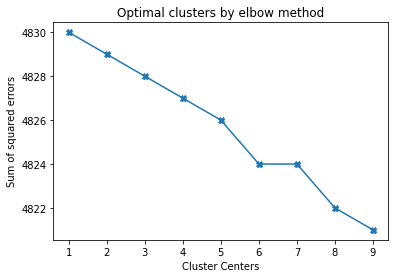

In [38]:
plt.plot(K, sse, marker = 'X')
plt.xlabel('Cluster Centers')
plt.ylabel('Sum of squared errors')
plt.title('Optimal clusters by elbow method')

## Silhouette Score

[Silhouette Score](https://medium.com/@jyotiyadav99111/selecting-optimal-number-of-clusters-in-kmeans-algorithm-silhouette-score-c0d9ebb11308)

In [39]:
sdistortion = []
s = range(2, 10)
for k in s:
    scluster = KMeans(n_clusters = k)
    labels = scluster.fit_predict(tfidf_matrix)
    sdistortion.append(silhouette_score(tfidf_matrix, labels, metric = 'euclidean'))
    
sdistortion

[5.143834453296078e-07,
 5.144899870636114e-07,
 0.0004144218814514968,
 5.147032029923015e-07,
 5.148098773976554e-07,
 5.149165958730118e-07,
 5.150233586021601e-07,
 0.0004144223262964772]

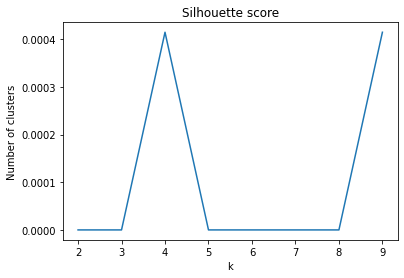

<Figure size 360x720 with 0 Axes>

In [40]:
plt.plot(s, sdistortion)
plt.xlabel('k')
plt.ylabel('Number of clusters')
plt.title('Silhouette score')
plt.figure(figsize = (5, 10))
plt.show()